In [65]:
import sage.combinat.q_analogues as q
import sage.combinat.combinat as comb
q_int = q.q_int
cat = comb.catalan_number

/tmp/ipykernel_60852/474006477.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


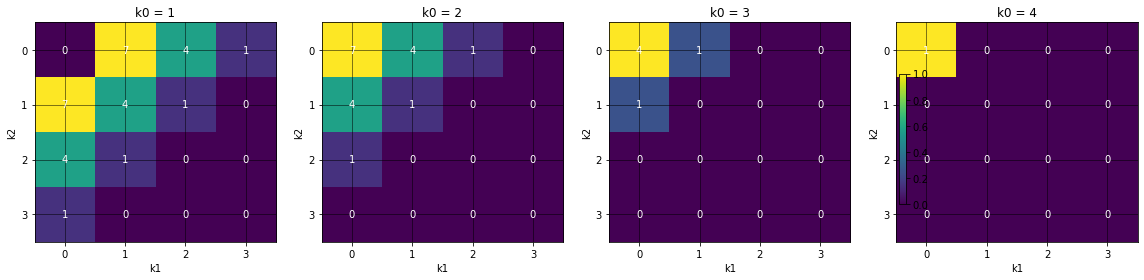

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tensor data
tensor = np.array([
    [
        [0, 7, 4, 1],
        [7, 4, 1, 0],
        [4, 1, 0, 0],
        [1, 0, 0, 0]
    ],
    [
        [7, 4, 1, 0],
        [4, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0]
    ],
    [
        [4, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ],
    [
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
])

# Create a figure and set of subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Titles for each subplot
titles = ['k0 = 1', 'k0 = 2', 'k0 = 3', 'k0 = 4']

# Plot each 2D slice
for i, ax in enumerate(axes):
    im = ax.imshow(tensor[i], cmap='viridis', aspect='auto')
    ax.set_title(titles[i])
    ax.set_xlabel('k1')
    ax.set_ylabel('k2')

    # Adding gridlines and setting ticks
    ax.set_xticks(range(4))
    ax.set_yticks(range(4))
    ax.grid(True, which='both', color='black', linestyle='-', linewidth=0.5)

    # Adding annotations
    for j in range(4):
        for k in range(4):
            ax.text(k, j, tensor[i, j, k], ha='center', va='center', color='white')

# Adjust layout and color bar
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.tight_layout()
plt.show()


In [67]:
def r(n, k):
    if k == 0:
        return comb.catalan_number(n)
    if k > n:
        return 0
    ans = 0
    for i in range(k-1, n):
        ans += r(n-1, i)
    return ans

In [68]:
def qp(n):
    return (q_int(2) - 1)**n

In [69]:
q_int(3)

q^2 + q + 1

In [70]:
qp(5)

q^5

In [71]:
for n in range(10):
    for k in range(n+1):
        print(r(n, k), end = "\t")
    print(f"Cat:{cat(n)}",end = " XX")
    print()

1	Cat:1 XX
1	1	Cat:1 XX
2	2	1	Cat:2 XX
5	5	3	1	Cat:5 XX
14	14	9	4	1	Cat:14 XX
42	42	28	14	5	1	Cat:42 XX
132	132	90	48	20	6	1	Cat:132 XX
429	429	297	165	75	27	7	1	Cat:429 XX
1430	1430	1001	572	275	110	35	8	1	Cat:1430 XX
4862	4862	3432	2002	1001	429	154	44	9	1	Cat:4862 XX


In [72]:
def rem(n):
    return sum([r(n-2, k)*qp(k)*q_int(n-2-k) for k in range(n-1)])

In [73]:
def rem2(n):
#     n-=2
    return sum([r(n, k)*q_int(k) for k in range(n+1)])

In [74]:
def q_Cat(n):
    if n == 0 or n==1:
        return 1
    return (q_int(n)*q_Cat(n-1) - q_int(n-2)*(cat(n-1)) + rem2(n-2))/(qp(n-2))

In [75]:
q_Cat(3)

q^2 + 2*q + 2

In [76]:
for n in range(10):
    
    print(n, rem2(n)) 

0 0
1 1
2 q + 3
3 q^2 + 4*q + 9
4 q^3 + 5*q^2 + 14*q + 28
5 q^4 + 6*q^3 + 20*q^2 + 48*q + 90
6 q^5 + 7*q^4 + 27*q^3 + 75*q^2 + 165*q + 297
7 q^6 + 8*q^5 + 35*q^4 + 110*q^3 + 275*q^2 + 572*q + 1001
8 q^7 + 9*q^6 + 44*q^5 + 154*q^4 + 429*q^3 + 1001*q^2 + 2002*q + 3432
9 q^8 + 10*q^7 + 54*q^6 + 208*q^5 + 637*q^4 + 1638*q^3 + 3640*q^2 + 7072*q + 11934


In [77]:
C, z = var('C,z')                                                             # needs sage.symbolic
sys = [ C == z + C*C ]                                                        

In [78]:
sol = solve(sys, C, solution_dict=True); sol                                  # needs sage.symbolic
# [{C: -1/2*sqrt(-4*z + 1) + 1/2}, {C: 1/2*sqrt(-4*z + 1) + 1/2}]
s0 = sol[0][C]; s1 = sol[1][C]     

In [79]:
r2 = s0*(1-3*z + z*z)

In [80]:
r2.series(z, 10)

1*z + (-2)*z^2 + 1*z^5 + 5*z^6 + 20*z^7 + 75*z^8 + 275*z^9 + Order(z^10)

In [81]:
import sage.combinat.non_decreasing_parking_function as PD
print(PD.NonDecreasingParkingFunctions(3).list())

[[1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 2, 2], [1, 2, 3]]


In [82]:
pd = lambda n: PD.NonDecreasingParkingFunctions(n).list()
print(pd(4))

[[1, 1, 1, 1], [1, 1, 1, 2], [1, 1, 1, 3], [1, 1, 1, 4], [1, 1, 2, 2], [1, 1, 2, 3], [1, 1, 2, 4], [1, 1, 3, 3], [1, 1, 3, 4], [1, 2, 2, 2], [1, 2, 2, 3], [1, 2, 2, 4], [1, 2, 3, 3], [1, 2, 3, 4]]


In [83]:
def fp(p):
    count = 0
    for i, pi in enumerate(p):
        if i+1 == pi:
            count+=1
    return count
def mx(p): return p[-1]
def knd(p): return len(set(p))
def freq(p): return len([i for i in p if i == 1])
def bump(p, n): return len([i for j,i in enumerate(p) if j+1 - n == i])

In [84]:
for p in pd(3):
    print(p, knd(p), fp(p))

[1, 1, 1] 1 1
[1, 1, 2] 2 1
[1, 1, 3] 2 2
[1, 2, 2] 2 2
[1, 2, 3] 3 3


In [85]:
n = 4
table = [[0]*(n) for i in range(n)]
for p in pd(n):
    table[bump(p, 0)-1][n - mx(p)] += 1

for row in table:
    print(*row)


0 2 2 1
2 2 1 0
2 1 0 0
1 0 0 0


In [86]:
n = 4
table = [[0]*(n) for i in range(n)]
for p in pd(n):
    table[bump(p, 0)-1][n - mx(p)] += 1

for row in table:
    print(*row)

0 2 2 1
2 2 1 0
2 1 0 0
1 0 0 0


In [87]:
n = 5
table = [[0]*(n) for i in range(n)]
for p in pd(n):
    table[fp(p)-1][freq(p)-1] += 1

for row in table:
    print(*row)

0 5 5 3 1
5 5 3 1 0
5 3 1 0 0
3 1 0 0 0
1 0 0 0 0


In [88]:
n = 6
table = [[0]*(n) for i in range(n)]
for p in pd(n):
    table[n - mx(p)][freq(p)-1] += 1

for row in table:
    print(*row)

14 14 9 4 1 0
14 14 9 4 1 0
9 9 6 3 1 0
4 4 3 2 1 0
1 1 1 1 1 0
0 0 0 0 0 1


In [89]:
# n = 6
# table = [[[0]*(n) for i in range(n)] for o in range(n)]
# for p in pd(n):
#     table[n - mx(p)][freq(p)-1][fp(p)-1] += 1

# for plane in table:
# #     for row in plane:
#     print(plane, end = n)
    


In [90]:
C, z , q, Cq= var('C,z, q, Cq')                                                             # needs sage.symbolic
sys = [ C == 1 + z*C*C ]   
sol = solve(sys, C, solution_dict=True); sol  
sys2 = [ Cq == 1 + q*z*(-1/2*(sqrt(-4*z + 1) - 1)/z)*Cq ] # needs sage.symbolic
sol2 = solve(sys2, Cq, solution_dict=True); sol2
# [{C: -1/2*sqrt(-4*z + 1) + 1/2}, {C: 1/2*sqrt(-4*z + 1) + 1/2}]
# s0 = sol[0][Cq]; s1 = sol[1][Cq]
c0 = sol2[0][Cq]
print(sol, sol2)

[{C: -1/2*(sqrt(-4*z + 1) - 1)/z}, {C: 1/2*(sqrt(-4*z + 1) + 1)/z}] [{Cq: 2/(q*sqrt(-4*z + 1) - q + 2)}]


In [91]:
c0.series(z, 3)

1 + (q)*z + (q^2 + q)*z^2 + Order(z^3)

In [92]:
def pd_m(n, m):
    if n == 1:
        return [[1]]
    pd_prev = pd_m(n-1, m)
    ans = []
    for pds in pd_prev:
        for i in range(pds[-1], m*n - m + 2):
            ans.append(pds + [i])
    return ans

In [95]:
for p in cat_p(3, 2):
    print(p)

[1, 1, 1, 2, 4, 6]
[1, 1, 2, 2, 4, 6]
[1, 1, 2, 3, 4, 6]
[1, 1, 2, 4, 4, 6]
[1, 1, 2, 4, 5, 6]
[1, 2, 2, 2, 4, 6]
[1, 2, 2, 3, 4, 6]
[1, 2, 2, 4, 4, 6]
[1, 2, 2, 4, 5, 6]
[1, 2, 3, 3, 4, 6]
[1, 2, 3, 4, 4, 6]
[1, 2, 3, 4, 5, 6]


In [96]:
def cat_p(n, m):

    res = pd_m(n, m)
    if m == 1:
        return res
    ans = []
    for p in res:
        p.extend([i for i in range(1, m*n+1) if i%m != 1])
        ans.append(sorted(p))
    return ans

In [97]:
for catp in cat_p(3, 2):
#     if leafbump(catp, 2) == 3:
        print(catp)

[1, 1, 1, 2, 4, 6]
[1, 1, 2, 2, 4, 6]
[1, 1, 2, 3, 4, 6]
[1, 1, 2, 4, 4, 6]
[1, 1, 2, 4, 5, 6]
[1, 2, 2, 2, 4, 6]
[1, 2, 2, 3, 4, 6]
[1, 2, 2, 4, 4, 6]
[1, 2, 2, 4, 5, 6]
[1, 2, 3, 3, 4, 6]
[1, 2, 3, 4, 4, 6]
[1, 2, 3, 4, 5, 6]


In [98]:
for p in pd_m(3,3):
    print(p)

[1, 1, 1]
[1, 1, 2]
[1, 1, 3]
[1, 1, 4]
[1, 1, 5]
[1, 1, 6]
[1, 1, 7]
[1, 2, 2]
[1, 2, 3]
[1, 2, 4]
[1, 2, 5]
[1, 2, 6]
[1, 2, 7]
[1, 3, 3]
[1, 3, 4]
[1, 3, 5]
[1, 3, 6]
[1, 3, 7]
[1, 4, 4]
[1, 4, 5]
[1, 4, 6]
[1, 4, 7]


In [99]:
def fp_m(p, m):
    count = 0
    for i, pi in enumerate(p):
        count += int(pi == m*i + 1 )
    return count

# def fpm(p, m):
#     exp = 1
#     ans =  0
#     for i, pi in enumerate(p):
#         if pi%m == 1:
#             if pi == exp:
#                 ans += 1
#             exp+=m
#     return ans

def fpm(p, m):
    return fp(p)-m
def mxm(p, m):
    mn = len(p)
    return mn-m+1 - max(u(p, m))

def mxu(p, m):
    n = len(p)
    return m*n-m+1 - max(p)

def mx_m(p, m):
    up = u(p, m)
    ans = 1
    for i,  pi in enumerate(up):
            if pi == 1:
                continue
            ans = pi//m + 1
    return ans
            
def u(pe, m):
    p = pe[:]
    if m == 1:
        return p
    nxt = 2
    ni = len(p)
    while m*len(p) > ni:
            if nxt in p:p.remove(nxt)
            nxt = (nxt + 1) if nxt%m != 0 else nxt + 2
    return p

from collections import Counter
def freqm(pe, m):
    count = Counter(pe)
    ans =  count[1]
    for k in count:
        if k%m == 1:
            ans += count[k]
    return ans

def leafbump(pe, m, l):
#     up = up(pe, m)
    count = 0
    for p in pe:
        if p == l:
            count+=1
    return count

def mfp(pe, m):
    cur = 1
    count = 0
    for pi in pe:
        if pi == cur*m - m + 1:
            count +=1
        cur+=1
    return count
            
        

In [100]:
n = 5
m = 2
line = [0]*(m*n)
line2 = [0]*(m*n)
for catp in cat_p(n, m):
    line[leafbump(catp, 2, 1)]+=1
    line2[leafbump(catp, 2, 2)]+=1
print(*line)
print(*line2)

0 143 88 33 8 1 0 0 0 0
0 143 88 33 8 1 0 0 0 0


In [101]:
n = 4
m = 2
ps = cat_p(n, m)
table = [[0]*(m*n-m+1) for i in range(m*n-m+1)]
for catp in ps:
    table[fpm(catp, m)][mxm(catp, m)] += 1

for row in table:
    print(*row)

0 0 3 3 3 2 1
0 3 3 3 2 1 0
3 3 3 2 1 0 0
3 3 2 1 0 0 0
3 2 1 0 0 0 0
2 1 0 0 0 0 0
1 0 0 0 0 0 0


In [102]:
n = 3
m = 10
line = [0]*(m*n)
for catp in cat_p(n, m):
    line[m*n-1 - max(u(catp, m))]+=1
print(*line)

0 0 0 0 0 0 0 0 11 11 11 11 11 11 11 11 11 11 11 10 9 8 7 6 5 4 3 2 1 0


In [103]:
n = 3
m = 2
ps = cat_p(n, m)
table = [[[0]*(n) for i in range(n+1)] for _ in range(n+1)]
for catp in ps:
    table[fpm(catp, m)][leafbump(catp, m, 1)-1][leafbump(catp, m, 2)-1] += 1

for plane in table:
    for row in plane:
        print(*row)
    print('='*n)

IndexError: list index out of range

In [104]:
def conv(dw):
    p = []
    cur = 1
    for c in dw[::-1]:
        if c == 'E':
            p.append(cur)
        else:
            cur+=1
    return p 
        

In [105]:
dw = "NNNENNNEE"
print(conv(dw))

[1, 1, 4]


In [106]:
def inv(p):
#     print(p)
    if len(p) <=1:
        return p
    ffp = 2
    while ffp != p[ffp-1]:
        ffp+=1
#     p1 = inv()
    p2 = []
    for i in range(ffp-1, len(p)):
#         print(i, p[i])
        p2.append(p[i] - ffp + 1)
    p2 = inv(p2)
    l = 1 + len(p2)
    for pi in inv(p[1:ffp-1]):
        p2.append(pi+l)
    return [1] + p2



In [107]:
l = inv([1,1,2,4,4,6])

In [108]:
from collections import Counter
def top(p, m):
    cp = Counter(p)
    mn = len(p)
    cur = 1
    ans = [1]
    for i in range(mn - m + 1, 1, -m):
        co = cp.get(i, 0)
        cur += co
        ans.append(cur)
    return ans
    

In [109]:
print(top(l, 2))

[1, 3, 4]


In [110]:
n = 4
m = 2
diff  = 0
for qi in cat_p(n, m):
    ji = top(inv(qi), m)
#     diff += abs(fpm(qi, m)-mxu(ji, m))
    print(qi, ji, fpm(qi, m), mxu(ji, m))
print(diff)
    

[1, 1, 1, 1, 2, 4, 6, 8] [1, 3, 5, 7] 0 0
[1, 1, 1, 2, 2, 4, 6, 8] [1, 2, 5, 7] 0 0
[1, 1, 1, 2, 3, 4, 6, 8] [1, 1, 5, 7] 0 0
[1, 1, 1, 2, 4, 4, 6, 8] [1, 3, 4, 7] 0 0
[1, 1, 1, 2, 4, 5, 6, 8] [1, 3, 3, 7] 0 0
[1, 1, 1, 2, 4, 6, 6, 8] [1, 3, 5, 6] 1 1
[1, 1, 1, 2, 4, 6, 7, 8] [1, 3, 5, 5] 2 2
[1, 1, 2, 2, 2, 4, 6, 8] [1, 2, 4, 7] 0 0
[1, 1, 2, 2, 3, 4, 6, 8] [1, 1, 4, 7] 0 0
[1, 1, 2, 2, 4, 4, 6, 8] [1, 2, 3, 7] 0 0
[1, 1, 2, 2, 4, 5, 6, 8] [1, 2, 2, 7] 0 0
[1, 1, 2, 2, 4, 6, 6, 8] [1, 2, 5, 6] 1 1
[1, 1, 2, 2, 4, 6, 7, 8] [1, 2, 5, 5] 2 2
[1, 1, 2, 3, 3, 4, 6, 8] [1, 1, 3, 7] 0 0
[1, 1, 2, 3, 4, 4, 6, 8] [1, 1, 2, 7] 0 0
[1, 1, 2, 3, 4, 5, 6, 8] [1, 1, 1, 7] 0 0
[1, 1, 2, 3, 4, 6, 6, 8] [1, 1, 5, 6] 1 1
[1, 1, 2, 3, 4, 6, 7, 8] [1, 1, 5, 5] 2 2
[1, 1, 2, 4, 4, 4, 6, 8] [1, 3, 4, 6] 1 1
[1, 1, 2, 4, 4, 5, 6, 8] [1, 3, 3, 6] 1 1
[1, 1, 2, 4, 4, 6, 6, 8] [1, 3, 4, 5] 2 2
[1, 1, 2, 4, 4, 6, 7, 8] [1, 3, 4, 4] 3 3
[1, 1, 2, 4, 5, 5, 6, 8] [1, 3, 3, 5] 2 2
[1, 1, 2, 4, 5, 6, 6, 8] [1, 3, 3,

In [111]:
def tod(p, m):
    ans = []
    for pi, pii in zip(p, p[1:]+[m*len(p)+1]):
        print(pi, pii)
        mod = pi%m if pi%m != 0 else m
        ans.extend([0]*(m+1-mod))
        if pii%m == 1:
            ans.extend([1]*((pii-pi)//m))
    return ans


In [112]:
n = 2
m = 2
for p in pd_m(n,m):
    print(p, mfp(p, m), mxu(p, m))

[1, 1] 1 2
[1, 2] 1 1
[1, 3] 2 0


In [113]:
def recpd(p, n, m):
    ps = [[] for i in range(m+1)]
    

In [114]:
def deficit(p, b):
    return n - p[-b]

In [115]:
for j in range(2, 7):
    n, m = j, 1
    b = 2
    line = [0]*(m*n+m)
    for p in pd_m(n,m):
        line[deficit(p, b)]+=1
    print(*line)

0 2 0
0 2 3 0
0 4 6 4 0
0 10 15 12 5 0
0 28 42 36 20 6 0


In [116]:
def last_k(p, m):
    mn = len(p)
    cur = mn - m + 1
    for i in range(mn - m, 0, -1):
        if p[i] == i+1:
            return i
    return 0

def first_k(p, m):
    mn = len(p)
    for i in range(1, len(p)):
        if p[i] == i+1:
            return i
    

def shift(p):
    k = p[0]
    return list(map(lambda x: x - k+1, p))
 
w = 5
from collections import defaultdict
counter = defaultdict(int)
for catp in cat_p(3, 2):
#         k = last_k(catp, 2)
        k = first_k(catp, 2)
        print(catp, catp[:k], shift(catp[k:]))
        
#         print(catp, k)
#         counter[tuple(shift(catp[k:-1]))]+=1
#         if len(shift(catp[k:-1])) == w : print(shift(catp[k:-1]))
        
for k, v in sorted(counter.items(), key = lambda x: (-x[1], len(x[0]))):
    print(k, v)

[1, 1, 1, 2, 4, 6] [1, 1, 1, 2, 4] [1]
[1, 1, 2, 2, 4, 6] [1, 1, 2, 2, 4] [1]
[1, 1, 2, 3, 4, 6] [1, 1, 2, 3, 4] [1]
[1, 1, 2, 4, 4, 6] [1, 1, 2] [1, 1, 3]
[1, 1, 2, 4, 5, 6] [1, 1, 2] [1, 2, 3]
[1, 2, 2, 2, 4, 6] [1] [1, 1, 1, 3, 5]
[1, 2, 2, 3, 4, 6] [1] [1, 1, 2, 3, 5]
[1, 2, 2, 4, 4, 6] [1] [1, 1, 3, 3, 5]
[1, 2, 2, 4, 5, 6] [1] [1, 1, 3, 4, 5]
[1, 2, 3, 3, 4, 6] [1] [1, 2, 2, 3, 5]
[1, 2, 3, 4, 4, 6] [1] [1, 2, 3, 3, 5]
[1, 2, 3, 4, 5, 6] [1] [1, 2, 3, 4, 5]


In [117]:
# w = 1
for catp in cat_p(w-2, 2):
        if fp(catp)-2 == 0 : print(catp[:-1])

[1, 1, 1, 2, 4]
[1, 1, 2, 2, 4]
[1, 1, 2, 3, 4]


In [118]:
def countp(p, pi):
    return len(list(filter(lambda x: x == pi, p)))

In [119]:
def fxp(p, m):
    p = u(p, m)
    ind = 0
    count =  0
    for pi in p:
        if pi == m*ind + 1:
            count+=1
        ind += 1
    return count

In [130]:
n = 3
m = 3
table = [[[0]*(n+1) for j in range(n+1)] for i in range(n+1)]
tsmall =[[0]*(n+1) for j in range(n+1)]
line = [0]*n
for p in cat_p(n,m):
    table[fxp(p, m)][countp(p, 1)-1][countp(p,2)-1]+=1
#     print(p, countp(p, 2), fxp(p, m))
#     line[countp(p, 2)-1]+=1
    tsmall[fxp(p, m)-1][countp(p, 1) - 1] += 1
for plane in table:
    for row in plane:
        print(*row)
    print("-"*n)

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
---
4 4 1 0
4 1 0 0
1 0 0 0
0 0 0 0
---
4 1 0 0
1 0 0 0
0 0 0 0
0 0 0 0
---
1 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
---


In [158]:
n = 3
m = 4
table = [[[0]*(n+1) for j in range(n+1)] for i in range(n+1)]
tsmall =[[0]*(n+1) for j in range(n+1)]
line = [0]*n
for p in cat_p(n,m):
    table[fxp(p, m)-1][countp(p, 1)-1][countp(p,2)-1]+=1
#     print(p, countp(p, 2), fxp(p, m))
#     line[countp(p, 2)-1]+=1
    tsmall[fxp(p, m)-1][countp(p, 1) - 1] += 1
# for plane in table:
#     for row in plane:
#         print(*row)
#     print("-"*n)

poll = 0
t0, t1, t2 = var('t0, t1, t2')  
for l in range(n+1):
    for w1 in range(n+1): 
        for w2 in range(n+1):
            poll += table[l][w1][w2]*(t0**l)*(t1**w1)*(t2**w2)
print(poll)
                

t0^2 + t0*t1 + t1^2 + t0*t2 + t1*t2 + t2^2 + 6*t0 + 6*t1 + 6*t2 + 11


In [164]:
n = 5
m = 3
table3 = [[[[0]*(n+1) for j in range(n+1)] for i in range(n+1)] for _ in range(n+1)]
tsmall =[[0]*(n+1) for j in range(n+1)]
line = [0]*n
for p in cat_p(n,m):
    table3[fxp(p, m)-1][countp(p, 1)-1][countp(p,2)-1][countp(p, 3)-1]+=1
#     print(p, countp(p, 2), fxp(p, m))
#     line[countp(p, 2)-1]+=1
    tsmall[fxp(p, m)-1][countp(p, 1) - 1] += 1

pol = 0
q0, q1, q2, q3 = var('q0, q1, q2, q3')  
for l in range(n+1):
    for w1 in range(n+1): 
        for w2 in range(n+1):
            for w3 in range(n+1):
                pol += table3[l][w1][w2][w3]*(q0**l)*(q1**w1)*(q2**w2)*(q3**w3)
print(pol)

q0^4 + q0^3*q1 + q0^2*q1^2 + q0*q1^3 + q1^4 + q0^3*q2 + q0^2*q1*q2 + q0*q1^2*q2 + q1^3*q2 + q0^2*q2^2 + q0*q1*q2^2 + q1^2*q2^2 + q0*q2^3 + q1*q2^3 + q2^4 + q0^3*q3 + q0^2*q1*q3 + q0*q1^2*q3 + q1^3*q3 + q0^2*q2*q3 + q0*q1*q2*q3 + q1^2*q2*q3 + q0*q2^2*q3 + q1*q2^2*q3 + q2^3*q3 + q0^2*q3^2 + q0*q1*q3^2 + q1^2*q3^2 + q0*q2*q3^2 + q1*q2*q3^2 + q2^2*q3^2 + q0*q3^3 + q1*q3^3 + q2*q3^3 + q3^4 + 9*q0^3 + 9*q0^2*q1 + 9*q0*q1^2 + 9*q1^3 + 9*q0^2*q2 + 9*q0*q1*q2 + 9*q1^2*q2 + 9*q0*q2^2 + 9*q1*q2^2 + 9*q2^3 + 9*q0^2*q3 + 9*q0*q1*q3 + 9*q1^2*q3 + 9*q0*q2*q3 + 9*q1*q2*q3 + 9*q2^2*q3 + 9*q0*q3^2 + 9*q1*q3^2 + 9*q2*q3^2 + 9*q3^3 + 39*q0^2 + 39*q0*q1 + 39*q1^2 + 39*q0*q2 + 39*q1*q2 + 39*q2^2 + 39*q0*q3 + 39*q1*q3 + 39*q2*q3 + 39*q3^2 + 91*q0 + 91*q1 + 91*q2 + 91*q3


In [58]:
for row in tsmall:
    print(*row)

0 0 0
0 0 0
0 0 0


In [59]:
n = 4
m = 4
table = [[[0]*(n+1) for j in range(n+1)] for i in range(n+1)]
tsmall =[[0]*(n+1) for j in range(n+1)]
line = [0]*n
for p in cat_p(n,m):
    table[fxp(p, m)-1][countp(p, 2)-1][countp(p,4)-1]+=1
#     print(p, countp(p, 2), fxp(p, m))
#     line[countp(p, 2)-1]+=1
#     print(u(p,m),fxp(p, m), countp(p, 1) )
#     tsmall[fxp(p, m)-1][countp(p, 1)-1] += 1
# print(*line)
for plane in table:
    for r in plane:
        print(*r)
    print("#"*100)

NameError: name 'cat_p' is not defined

In [60]:
n = 4
m = 2
for m in range(1, 5):
    print(f'm = {m}')
    table = [[[0]*(n+1) for j in range(n+1)] for i in range(n+1)]
    tsmall =[[0]*(n+1) for j in range(n+1)]
    line = [0]*n
    for p in cat_p(n,m):
        table[fxp(p, m)][countp(p, 1)-1][countp(p,2)-1]+=1
    #     print(p, countp(p, 2), fxp(p, m))
    #     line[countp(p, 2)-1]+=1
    #     print(u(p,m),fxp(p, m), countp(p, 1) )
#         tsmall[fxp(p, m)-1][countp(p, 1)] += 1
    # print(*line)
    for r in tsmall:
        print(*r)
    print()

m = 1


NameError: name 'cat_p' is not defined

In [61]:
n = 4
m = 4
for mi in range(1, m+1):
    for ni in range(1, n+1):
        line = [0]*ni
        for pm in cat_p(ni, mi):
            line[fxp(pm, mi)-1]+=1
        print(*line)
    print("*"*10)
    

NameError: name 'cat_p' is not defined

In [62]:
# C, z , q, Cq= var('C,z, q, Cq')                                                             # needs sage.symbolic
# sys = [ C == 1 + z*C*C ]   
# sol = solve(sys, C, solution_dict=True); sol  
# sys2 = [ Cq == 1 + q*z*(-1/2*(sqrt(-4*z + 1) - 1)/z)*Cq ] # needs sage.symbolic
# sol2 = solve(sys2, Cq, solution_dict=True); sol2
# # [{C: -1/2*sqrt(-4*z + 1) + 1/2}, {C: 1/2*sqrt(-4*z + 1) + 1/2}]
# # s0 = sol[0][Cq]; s1 = sol[1][Cq]
# c0 = sol2[0][Cq]
# print(sol, sol2)
import sage.combinat.combinat
m = 3
C, z , q, Cq= var('C,z, q, Cq')                                                             # needs sage.symbolic
sys = [ C == 1 + z*C*C*C]   
sol = solve(sys, C, solution_dict=True); sol  
# sys2 = [ Cq == 1 + q*z*(-1/2*(sqrt(-4*z + 1) - 1)/z)*Cq ] # needs sage.symbolic
# sol2 = solve(sys2, Cq, solution_dict=True); sol2
# [{C: -1/2*sqrt(-4*z + 1) + 1/2}, {C: 1/2*sqrt(-4*z + 1) + 1/2}]
s0 = sol[0][C]; s1 = sol[1][C]
# c0 = sol2[0][Cq]
# print(sol, sol2)
print(sol)

[{C: -1/2*(I*sqrt(3) + 1)*(1/6*sqrt(1/3)*sqrt((27*z - 4)/z)/z - 1/2/z)^(1/3) - 1/6*(-I*sqrt(3) + 1)/(z*(1/6*sqrt(1/3)*sqrt((27*z - 4)/z)/z - 1/2/z)^(1/3))}, {C: -1/2*(-I*sqrt(3) + 1)*(1/6*sqrt(1/3)*sqrt((27*z - 4)/z)/z - 1/2/z)^(1/3) - 1/6*(I*sqrt(3) + 1)/(z*(1/6*sqrt(1/3)*sqrt((27*z - 4)/z)/z - 1/2/z)^(1/3))}, {C: (1/6*sqrt(1/3)*sqrt((27*z - 4)/z)/z - 1/2/z)^(1/3) + 1/3/(z*(1/6*sqrt(1/3)*sqrt((27*z - 4)/z)/z - 1/2/z)^(1/3))}]


In [63]:
def ffp(p, m):
    i = 1
    for pi in p[1:]:
        if pi == m*i + 1:
            break
        i+=1
    return i

n = 5
m = 2
count = 0
for pm in pd_m(n, m):
    i = ffp(pm, m)
    if i == n and pm[-1]:
        print(pm, pm[:i], pm[i:])
        count += 1
print(count)

[1, 1, 1, 1, 1] [1, 1, 1, 1, 1] []
[1, 1, 1, 1, 2] [1, 1, 1, 1, 2] []
[1, 1, 1, 1, 3] [1, 1, 1, 1, 3] []
[1, 1, 1, 1, 4] [1, 1, 1, 1, 4] []
[1, 1, 1, 1, 5] [1, 1, 1, 1, 5] []
[1, 1, 1, 1, 6] [1, 1, 1, 1, 6] []
[1, 1, 1, 1, 7] [1, 1, 1, 1, 7] []
[1, 1, 1, 1, 8] [1, 1, 1, 1, 8] []
[1, 1, 1, 2, 2] [1, 1, 1, 2, 2] []
[1, 1, 1, 2, 3] [1, 1, 1, 2, 3] []
[1, 1, 1, 2, 4] [1, 1, 1, 2, 4] []
[1, 1, 1, 2, 5] [1, 1, 1, 2, 5] []
[1, 1, 1, 2, 6] [1, 1, 1, 2, 6] []
[1, 1, 1, 2, 7] [1, 1, 1, 2, 7] []
[1, 1, 1, 2, 8] [1, 1, 1, 2, 8] []
[1, 1, 1, 3, 3] [1, 1, 1, 3, 3] []
[1, 1, 1, 3, 4] [1, 1, 1, 3, 4] []
[1, 1, 1, 3, 5] [1, 1, 1, 3, 5] []
[1, 1, 1, 3, 6] [1, 1, 1, 3, 6] []
[1, 1, 1, 3, 7] [1, 1, 1, 3, 7] []
[1, 1, 1, 3, 8] [1, 1, 1, 3, 8] []
[1, 1, 1, 4, 4] [1, 1, 1, 4, 4] []
[1, 1, 1, 4, 5] [1, 1, 1, 4, 5] []
[1, 1, 1, 4, 6] [1, 1, 1, 4, 6] []
[1, 1, 1, 4, 7] [1, 1, 1, 4, 7] []
[1, 1, 1, 4, 8] [1, 1, 1, 4, 8] []
[1, 1, 1, 5, 5] [1, 1, 1, 5, 5] []
[1, 1, 1, 5, 6] [1, 1, 1, 5, 6] []
[1, 1, 1, 5, 7] [1, 

In [64]:
n = 3
m = 2
